# Lab II - Clustering

## Machine Learning II

Moisés Alfonso Guerrero Jiménez

In [1]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Workshop II

1. Research about the **Spectral Clustering** method, and answer the following questions:
    * In which cases might it be more useful to apply?
    * What are the mathematical fundamentals of it?
    * What is the algorithm to compute it?
    * Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

**Spectral Clustering**

Traditional clustering methods like K-means use a spherical or elliptical metric to group data points. Hence they will not work well when the clusters are non-convex like the following picture example.

<center><img src="imgs/concentric_circles.PNG"/></center>

Spectral clustering is a generalization of standard clustering methods, and is designed for these situations.

Consider a set un $N$ points $x_{i}\in \mathbb{R}^{p}$, and let $d_{ii'}$ be the Euclidean distance between $x_{i}$ and $x_{i'}$. We will use as similarity matrix the radial-kernel gram matrix; that is,

$$s_{ii'}=e^{-d_{ii'}^{2}/c}$$

where $c>0$ is a scale parameter.

There are many ways to define a similarity matrix and its associated similarity graph that reflect local behavior. The most popular is the mutual *K-nearest-neighbor graph*. Define $\mathcal{N}_{K}$ to be the symmetric set of nearby pairs of points; specifically a pair $(i, i')$ is in $\mathcal{N}_{K}$ if point $i$ is among the K-nearest neighbors of $i'$, or vice-versa. Then we connect all symmetric nearest neighbors, and give them edge weight $w_{ii'}=s_{ii'}$ ; otherwise the edge weight is zero. Equivalently we set to zero all the pairwise similarities not in $\mathcal{N}_{K}$, and draw the graph for this modified similarity matrix.

The matrix of edge weights $W=\{w_{ii'}\}$ from a similarity graph is called the adjacency matrix. The degree of vertex $i$ is $g_{i}=\sum_{i'}{w_{ii'}}$, the sum of the weights of the edges connected to it. Let $G$ be a diagonal matrix with diagonal elements $g_{i}$.

Finally, the graph Laplacian is defined by:

$$L=G-W$$

This is called the unnormalized graph Laplacian.

Spectral clustering finds the $m$ eigenvectors $Z_{N\times m}$ corresponding to the $m$ smallest eigenvalues of $L$ (ignoring the trivial constant eigenvector). Using a standard method like K-means, we then cluster the rows of $Z$ to yield a clustering of the original data points.

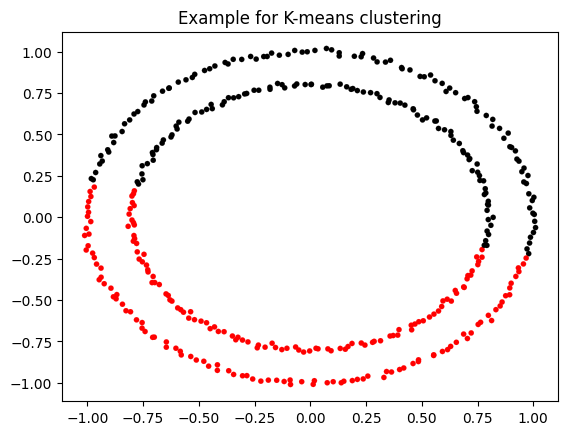

c:\Users\Moisés Guerrero\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Affinity matrix: 
  (0, 182)	0.5
  (0, 357)	1.0
  (0, 155)	1.0
  (0, 347)	1.0
  (0, 96)	1.0
  (0, 215)	1.0
  (0, 11)	1.0
  (0, 295)	1.0
  (0, 320)	1.0
  (0, 161)	1.0
  (0, 0)	1.0
  (1, 77)	0.5
  (1, 383)	1.0
  (1, 312)	1.0
  (1, 25)	1.0
  (1, 264)	1.0
  (1, 205)	1.0
  (1, 102)	1.0
  (1, 136)	1.0
  (1, 69)	1.0
  (1, 261)	1.0
  (1, 1)	1.0
  (2, 368)	0.5
  (2, 272)	0.5
  (2, 328)	1.0
  :	:
  (397, 143)	1.0
  (397, 241)	1.0
  (397, 371)	1.0
  (397, 149)	1.0
  (397, 397)	1.0
  (398, 339)	1.0
  (398, 298)	1.0
  (398, 190)	1.0
  (398, 286)	1.0
  (398, 213)	1.0
  (398, 117)	1.0
  (398, 177)	1.0
  (398, 59)	1.0
  (398, 313)	1.0
  (398, 398)	1.0
  (399, 170)	0.5
  (399, 20)	1.0
  (399, 24)	1.0
  (399, 129)	1.0
  (399, 310)	1.0
  (399, 379)	1.0
  (399, 30)	1.0
  (399, 37)	1.0
  (399, 53)	1.0
  (399, 399)	1.0
Labels: 
[1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1
 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0

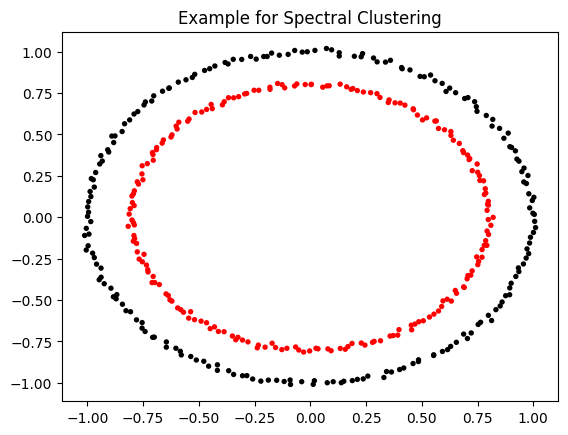

In [21]:
# In Python we can implement this as follows
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

# cluster with kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)

# plot the data, colouring it by cluster
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters, cmap='flag')
plt.title("Example for K-means clustering")
plt.show()

# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)
print(f"Affinity matrix: \n{model.affinity_matrix_}")
print(f"Labels: \n{model.labels_}")
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')
plt.title("Example for Spectral Clustering")
plt.show()

This clustering method is strongly related to K-means because of the way we construct the similarity matrix.

2. Research about the DBSCAN method, and answer the following questions:
    * In which cases might it be more useful to apply?
    * What are the mathematical fundamentals of it?
    * Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

In [22]:
# TODO: Finish the exercise

3. What is the elbow method in clustering? And which flaws does it pose to assess quality?

**R/** The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.

**Flaws it presents when assessing quality**

* The choice of the "elbow point" can be subjective and might vary between individuals analyzing the same data.
* It assumes that clusters are spherical and equally sized, which may not hold for complex datasets with irregularly shaped or differently sized clusters.
* Sensitivity to the initial cluster centroids, which can affect the WCSS values and, consequently, the choice of the optimal K.
* For large datasets, calculating WCSS for a range of K values can be computationally expensive and  time-consuming.
* It specifically applies to k-means clustering and may not be suitable for other clustering algorithms with different objectives.

**References**
- https://builtin.com/data-science/elbow-method
- https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

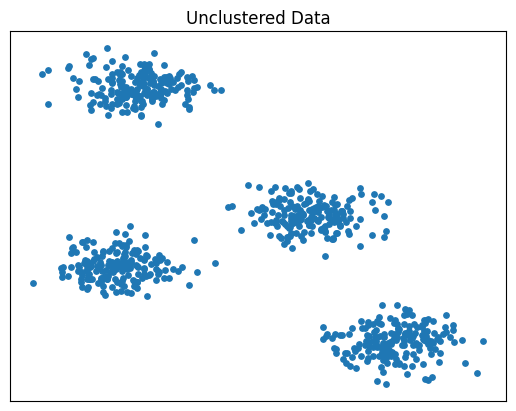

In [44]:
# Specifying the number of cluster our data should have
n_components = 4

X, true_labels = make_blobs(
    n_samples=750, centers=n_components, cluster_std=0.4, random_state=0
)

plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
n_clusters = 4
n_samples, n_features = X.shape
idx = np.random.choice(n_samples, n_clusters, replace=False)
centroids = X[idx]
centroids

array([[0.34309472, 4.54793908],
       [0.90000868, 4.14584752],
       [1.98124605, 0.57460426],
       [1.34900943, 4.43977332]])

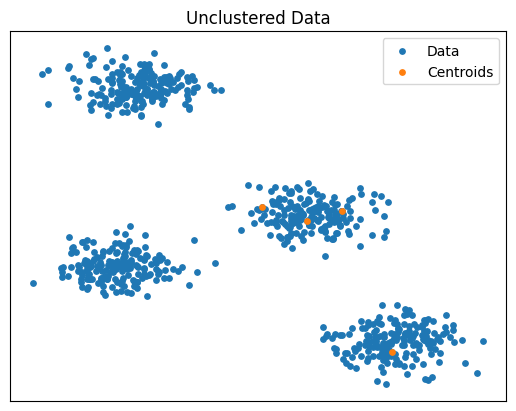

In [47]:
plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.scatter(centroids[:, 0], centroids[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.legend(['Data', 'Centroids'])
plt.show()

In [55]:
i = 0
distances = np.zeros((X.shape[0], n_clusters))
for i, centroid in enumerate(centroids):
    distances[:, i] = np.linalg.norm(X - centroid, axis=1)
distances

array([[5.07303376, 2.81595526, 0.76188847, 3.02440561],
       [2.64782955, 0.37813059, 3.02263708, 0.94599778],
       [2.75233095, 3.25377925, 4.61752425, 3.89262005],
       ...,
       [1.88705051, 0.76903807, 4.15170491, 0.76372193],
       [2.23777625, 2.32452495, 4.01846415, 2.96746751],
       [1.72570377, 0.68803098, 4.01893295, 0.99282421]])

In [56]:
labels = np.argmin(distances, axis=1)

In [57]:
new_centroids = np.zeros((n_clusters, n_features))
new_centroids

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [58]:
for j in range(n_clusters):
    new_centroids[j] = np.mean(X[labels == j], axis=0)

new_centroids

array([[-1.40714949,  5.89792348],
       [ 0.03750294,  3.61205223],
       [ 2.01975098,  0.8451525 ],
       [ 1.18717761,  4.5287853 ]])

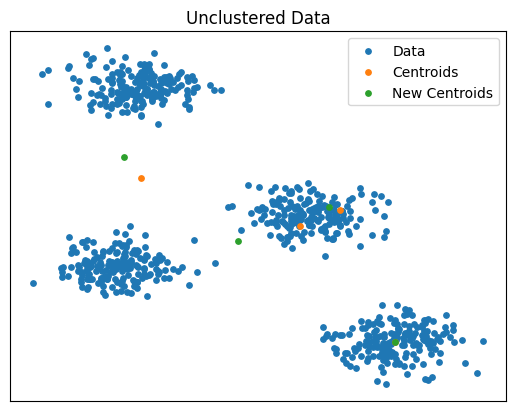

In [59]:
plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.scatter(centroids[:, 0], centroids[:, 1], s=15)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.legend(['Data', 'Centroids', 'New Centroids'])
plt.show()

In [60]:
if np.sum(np.abs(new_centroids - centroids)) < 1e-15:
    print("Break!")

In [61]:
centroids = new_centroids